In [1]:
import pandas as pd
import numpy as np
#from sqlalchemy import create_engine
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#read in tweets as DataFrame
tweets="new_df2drop.csv"
final_df = pd.read_csv(tweets)
final_df

,Unnamed: 0,handle,text,cleantext
0,0,1,The question in this election Who can put the ...,question election put plans action make life b...
1,1,1,If we stand together theres nothing we cant do...,stand together theres nothing cant Make sure y...
2,2,1,Both candidates were asked about how theyd con...,candidates asked theyd confront racial injusti...
3,3,0,Join me for a 3pm rally tomorrow at the MidAme...,Join 3pm rally tomorrow MidAmerica Center Coun...
4,4,1,This election is too important to sit out Go t...,election important sit Go make sure youre regi...
...,...,...,...,...
5640,5643,0,lilredfrmkokomo realDonaldTrump My Facebook Gr...,lilredfrmkokomo realDonaldTrump Facebook Group...
5641,5644,0,marybnall01 realDonaldTrump watched lowell mas...,marybnall01 realDonaldTrump watched lowell mas...
5642,5645,0,ghosthunter_lol Iowa key endorsement for realD...,ghosthunter_lol Iowa key endorsement realDonal...
5643,5646,0,iLoveiDevices EdwinRo47796972 happyjack225 Fox...,iLoveiDevices EdwinRo47796972 happyjack225 Fox...


In [ ]:
# # remove all https:// and http:// urls
# final_df['cleantext'] = final_df["cleantext"].str.replace(r"(https?://[^\s]+)", "" ,regex=True)

# # remove all punctuation EXCEPT FOR !
# final_df['cleantext'] = final_df['cleantext'].str.replace(r'[^\w\s!]+', '')
# final_df['cleantext']

In [4]:
donald_df =  final_df.loc[(final_df['handle'] == 0)]
donald_df

,Unnamed: 0,handle,text,cleantext
3,3,0,Join me for a 3pm rally tomorrow at the MidAme...,Join 3pm rally tomorrow MidAmerica Center Coun...
6,6,0,Once again we will have a government of by and...,government people Join MOVEMENT today!
7,7,0,Hillary Clintons Campaign Continues To Make Fa...,Hillary Clintons Campaign Continues Make False...
8,8,0,CNBC Time magazine online polls say Donald Tru...,CNBC Time magazine online polls say Donald Tru...
10,10,0,Great afternoon in Little Havana with Hispanic...,Great afternoon Little Havana Hispanic communi...
...,...,...,...,...
5640,5643,0,lilredfrmkokomo realDonaldTrump My Facebook Gr...,lilredfrmkokomo realDonaldTrump Facebook Group...
5641,5644,0,marybnall01 realDonaldTrump watched lowell mas...,marybnall01 realDonaldTrump watched lowell mas...
5642,5645,0,ghosthunter_lol Iowa key endorsement for realD...,ghosthunter_lol Iowa key endorsement realDonal...
5643,5646,0,iLoveiDevices EdwinRo47796972 happyjack225 Fox...,iLoveiDevices EdwinRo47796972 happyjack225 Fox...


In [5]:
# donald_df_tweet = donald_df.loc[:,'cleantext':'cleantext']
# donald_df_tweet.head()

In [7]:
dstring = donald_df.to_string()
print(dstring)

      Unnamed: 0  handle                                               text                                          cleantext
3              3       0  Join me for a 3pm rally tomorrow at the MidAme...  Join 3pm rally tomorrow MidAmerica Center Coun...
6              6       0  Once again we will have a government of by and...             government people Join MOVEMENT today!
7              7       0  Hillary Clintons Campaign Continues To Make Fa...  Hillary Clintons Campaign Continues Make False...
8              8       0  CNBC Time magazine online polls say Donald Tru...  CNBC Time magazine online polls say Donald Tru...
10            10       0  Great afternoon in Little Havana with Hispanic...  Great afternoon Little Havana Hispanic communi...
11            11       0  In the last 24 hrs we have raised over 13M fro...  last 24 hrs raised 13M online donations Nation...
22            22       0  Well now theyre saying that I not only won the...  Well theyre saying NBC Presidentia

In [10]:
pd.set_option('display.max_rows', 1000)
s = donald_df['cleantext'].str.split(expand=True).stack().value_counts()
s.reset_index()
s.head()

Thank              445
Trump2016          336
Hillary            319
realDonaldTrump    284
Trump              261
dtype: int64

In [11]:
s.values.tolist()
print(s)

Thank              445
Trump2016          336
Hillary            319
realDonaldTrump    284
Trump              261
                  ... 
715                  1
closest              1
bodyguards           1
unhappy              1
OMAROSA              1
Length: 7843, dtype: int64


In [12]:
from wordcloud import WordCloud, STOPWORDS
# from nltk.corpus import stopwords
from PIL import Image

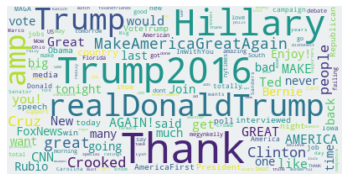

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["I","the"," the","t", "for","he" " but" "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=150, background_color="#ECF0F1").generate_from_frequencies(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
# plt.figure(figsize=(40, 30)
plt.axis("off")
plt.savefig('donald1.png')
plt.show()


In [15]:
plt.savefig('donald.jpeg')

<Figure size 432x288 with 0 Axes>